This is a bangla digit classifier model. It is trained on a hude dataset of bangla numbers. If a bangla digit is given as input, it outputs the corresponding english number. 

# **Impoting** **Libraries**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, BatchNormalization, Flatten, Dropout
from keras.utils import to_categorical
import cv2
from keras.optimizers import Adam

Using TensorFlow backend.


# **Loading the train dataset** 

In [2]:
x = np.load('./drive/My Drive/Beginner to Machine Learning/Digit/numta_x.npy')
y = np.load('drive/My Drive/Beginner to Machine Learning/Digit/numta_y.npy')

# **Plotting some arbitrary images from the training dataset to visualize**

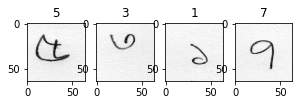

In [3]:
l = [34, 57, 19230, 6790, 456]

for i in range(1, len(l)):
  plt.subplot(1,5,i)
  plt.imshow(x[i-1], cmap = 'gray')
  plt.title(y[i-1])

# **Inverting images to black and white**

In [4]:
temp=[]
for i in x:
  (t, im) = cv2.threshold(i, 128, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)
  temp.append(im)
x= np.array(temp)

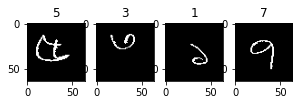

In [5]:
# Checking the inverted images

l = [34, 57, 19230, 6790, 456]

for i in range(1, len(l)):
  plt.subplot(1,5,i)
  plt.imshow(x[i-1], cmap = 'gray')
  plt.title(y[i-1])

In [6]:
#reshaping x and y is set to categorical as it is a classifier problem

x = x.reshape(-1, 64, 64, 1)
y = to_categorical(y)

# **The Training model**

In [7]:
model = Sequential()
model.add(Conv2D(64, (5, 5), input_shape=(64, 64, 1), activation='relu', padding='same'))
model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(MaxPooling2D((2, 2), strides=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2), strides=(2, 2)))
model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(BatchNormalization())

model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2), strides=(2, 2)))
model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(10, activation='softmax'))
 
adam = Adam(lr=.0001)
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=adam)
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 64, 64, 64)        1664      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 60, 64)        102464    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 128)       73856     
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 28, 128)       512       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 26, 26, 128)       147584    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 128)      

# **Training the dataset with the model**

In [8]:
model.fit(x, y, validation_split= 0.2, epochs= 5, batch_size= 200)

Train on 44213 samples, validate on 11054 samples
Epoch 1/5
44213/44213 [==============================] - 33s 748us/step - loss: 0.8791 - accuracy: 0.7012 - val_loss: 0.3853 - val_accuracy: 0.8709
Epoch 2/5
44213/44213 [==============================] - 29s 664us/step - loss: 0.2197 - accuracy: 0.9314 - val_loss: 0.1185 - val_accuracy: 0.9658
Epoch 3/5
44213/44213 [==============================] - 29s 665us/step - loss: 0.1269 - accuracy: 0.9615 - val_loss: 0.1507 - val_accuracy: 0.9506
Epoch 4/5
44213/44213 [==============================] - 29s 663us/step - loss: 0.0890 - accuracy: 0.9742 - val_loss: 0.1139 - val_accuracy: 0.9683
Epoch 5/5
44213/44213 [==============================] - 29s 661us/step - loss: 0.0692 - accuracy: 0.9796 - val_loss: 0.0910 - val_accuracy: 0.9774


# **Testing your own data**

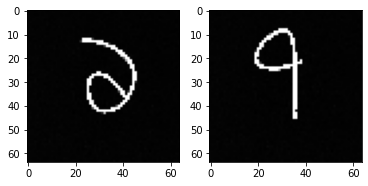

In [9]:
test1 = cv2.imread('/content/sample_data/one.jpg', 0)
test1 = cv2.resize(test1, (64,64))
plt.subplot(1, 2, 1)
plt.imshow(test1, cmap= 'gray')

test2 = cv2.imread('./sample_data/seven.jpg', 0)
test2 = cv2.resize(test2, (64,64))
plt.subplot(1, 2, 2)
plt.imshow(test2, cmap = 'gray')

# **Predict and Plot the data to see the result clearly**

Text(0.5, 1.0, '7')

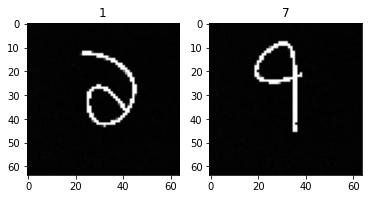

In [10]:
pred1 = model.predict(test1.reshape(1,64,64,1))
plt.subplot(1, 2, 1)
plt.imshow(test1, cmap = 'gray')
plt.title(np.argmax(pred1))

pred2 = model.predict(test2.reshape(1,64,64,1))
plt.subplot(1, 2, 2)
plt.imshow(test2, cmap = 'gray')
plt.title(np.argmax(pred2))